In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [25]:
X_train = pd.read_csv('ShopingData.csv')
df = X_train.copy()
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [26]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [27]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [28]:
df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [30]:
dfwithdummies=df.copy()
dfwithdummies['VisitorType']= label_encoder.fit_transform(df['VisitorType'])
dfwithdummies['Month']= label_encoder.fit_transform(df['Month'])
dfwithdummies.head(10)

"dummiesdf = pd.get_dummies(df['VisitorType'])\ndf.drop('VisitorType', inplace = True, axis = 1)\ndf['New_Visitor'] = dummiesdf['New_Visitor']\ndf['Other'] = dummiesdf['Other']\ndf['Returning_Visitor'] = dummiesdf['Returning_Visitor']\ndfmonth = pd.get_dummies(df['Month']) \ndf.drop('Month', inplace = True, axis = 1)\ndfwithdummies = pd.concat([df, dfmonth], axis = 1, sort = False)"

In [31]:
dfwithdummies['Class'] = df['Revenue'].astype(int)
dfwithdummies.drop('Revenue', axis = 1, inplace = True)
dfwithdummies['Weekend'] = df['Weekend'].astype(int)
dfcleaned = dfwithdummies.copy()

Text(0, 0.5, 'Frequency')

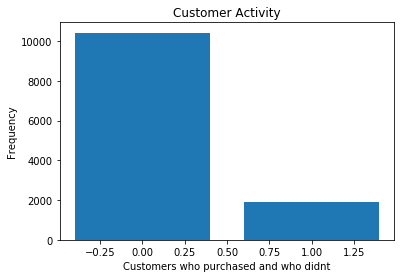

In [32]:
fig, ax = plt.subplots() 
data = X_train['Revenue'].value_counts() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency) 
ax.set_title('Customer Activity') 
ax.set_xlabel('Customers who purchased and who didnt') 
ax.set_ylabel('Frequency')

<Figure size 432x288 with 0 Axes>

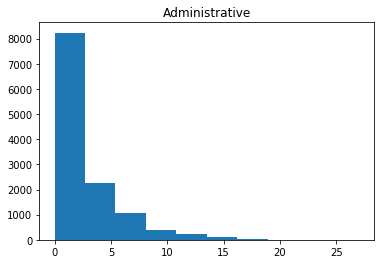

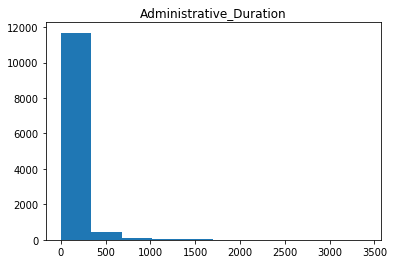

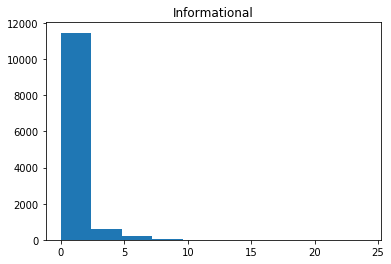

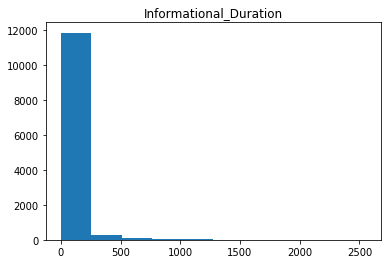

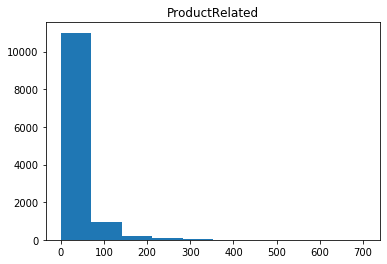

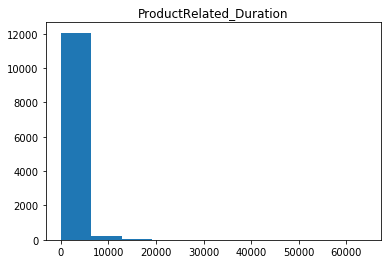

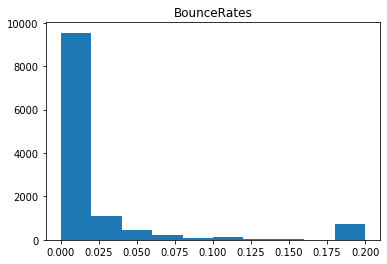

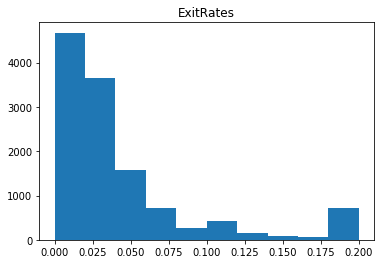

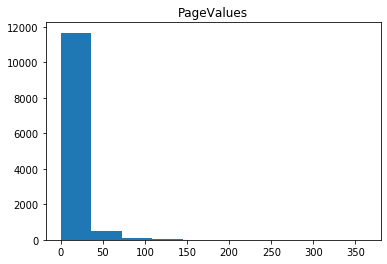

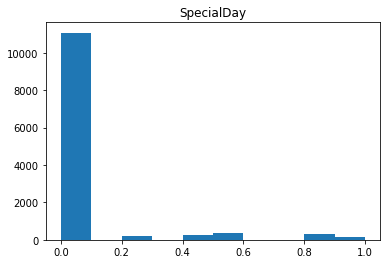

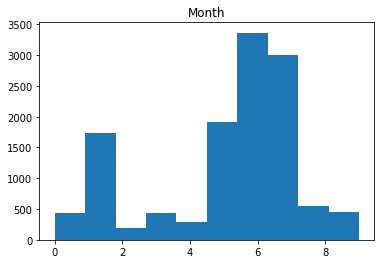

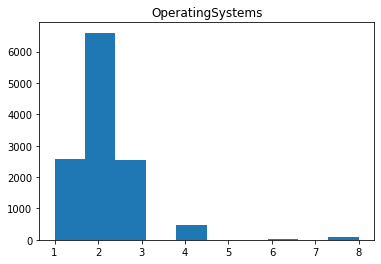

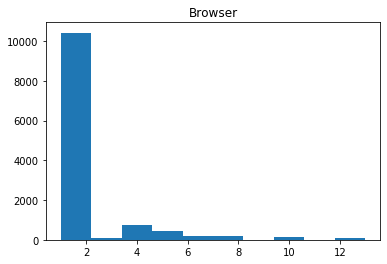

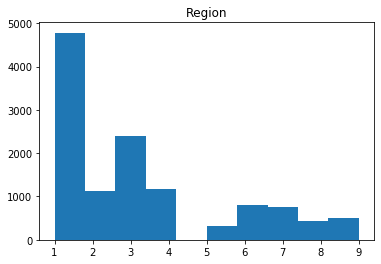

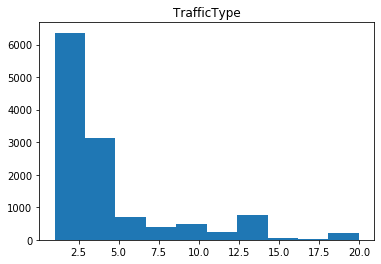

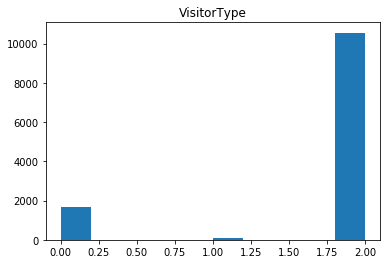

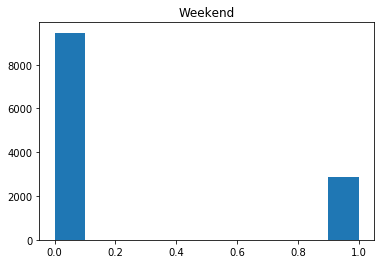

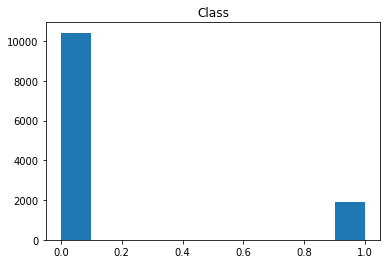

In [33]:
for idx,column in enumerate(dfwithdummies.columns): 
    plt.figure(idx)
    dfwithdummies.hist(column=column,grid=False)

In [ ]:
for idx,column in enumerate(dfwithdummies.columns): 
    plt.figure(idx)
    dfwithdummies.boxplot(column=column,grid=False)

In [ ]:
fig, ax = plt.subplots() 
data = X_train['VisitorType'].value_counts()
points = data.index 
frequency = data.values
ax.plot(points, frequency)
ax.set_title('Customer Activity over months') 
ax.set_xlabel('VisitorType') 
ax.set_ylabel('Frequency')

In [59]:
X = dfcleaned.drop('Class', axis = 1)
Y = dfcleaned['Class'].copy()

In [60]:
cor = X.corr()

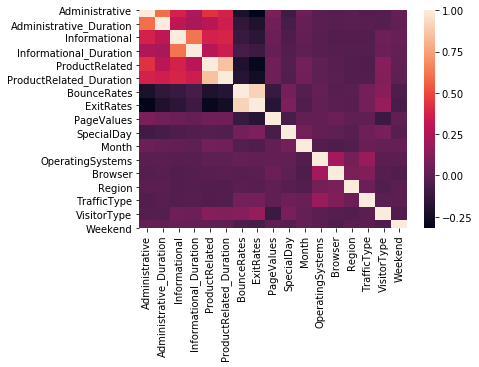

In [61]:
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)

In [62]:
def AvgMinutes(Count, Duration):
    if Duration == 0:
        output = 0
    elif Duration != 0:
        output = float(Duration)/float(Count)
    return output
    
Columns = [['Administrative', 'Administrative_Duration'], ['Informational', 'Informational_Duration'], ['ProductRelated', 'ProductRelated_Duration']]
    
    
X['AvgAdministrative'] = X.apply(lambda x: AvgMinutes(Count = x['Administrative'], Duration = x['Administrative_Duration']), axis = 1)
X['AvgInformational'] = X.apply(lambda x: AvgMinutes(Count = x['Informational'], Duration = x['Informational_Duration']), axis = 1)
X['AvgProductRelated'] = X.apply(lambda x: AvgMinutes(Count = x['ProductRelated'], Duration = x['ProductRelated_Duration']), axis = 1)
X.drop(['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration'], axis = 1, inplace = True)

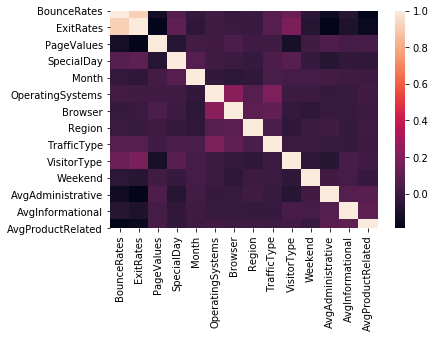

In [63]:
cor = X.corr()
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)

In [64]:
for i in X.columns:
    print('Feature:',i)
    print('# of N/A:',X[i].isna().sum())

Feature: BounceRates
# of N/A: 0
Feature: ExitRates
# of N/A: 0
Feature: PageValues
# of N/A: 0
Feature: SpecialDay
# of N/A: 0
Feature: Month
# of N/A: 0
Feature: OperatingSystems
# of N/A: 0
Feature: Browser
# of N/A: 0
Feature: Region
# of N/A: 0
Feature: TrafficType
# of N/A: 0
Feature: VisitorType
# of N/A: 0
Feature: Weekend
# of N/A: 0
Feature: AvgAdministrative
# of N/A: 0
Feature: AvgInformational
# of N/A: 0
Feature: AvgProductRelated
# of N/A: 0


In [65]:
for i in X_train.columns:
    print('####################')
    print('COLUMN TITLE:',i)
    print('# UNIQUE VALUES:',len(X_train[i].unique()))
    print('UNIQUE VALUES:',X_train[i].unique())
    print('####################')
    print()

####################
COLUMN TITLE: BounceRates
# UNIQUE VALUES: 1608
UNIQUE VALUES: [-0.18512753  1.88371933  0.90085703 ...  1.58509114 -0.17219726
  0.17056289]
####################

####################
COLUMN TITLE: ExitRates
# UNIQUE VALUES: 4015
UNIQUE VALUES: [-0.12104595 -0.33104594  0.65214246 ...  0.6301035  -0.26409856
 -0.22012806]
####################

####################
COLUMN TITLE: PageValues
# UNIQUE VALUES: 2180
UNIQUE VALUES: [ 0.         11.9955404  64.2879309  ... 29.4628439   5.15946221
 24.51269374]
####################

####################
COLUMN TITLE: SpecialDay
# UNIQUE VALUES: 6
UNIQUE VALUES: [0.  0.8 0.4 0.6 1.  0.2]
####################

####################
COLUMN TITLE: Month
# UNIQUE VALUES: 10
UNIQUE VALUES: [ 0.   0.5 -0.5 -1.5 -3.   1.  -1.   1.5 -2.5 -2. ]
####################

####################
COLUMN TITLE: Browser
# UNIQUE VALUES: 13
UNIQUE VALUES: [ 0. -1.  3.  2.  6.  4.  8. 10. 11.  1.  5.  9.  7.]
####################

################

<Figure size 432x288 with 0 Axes>

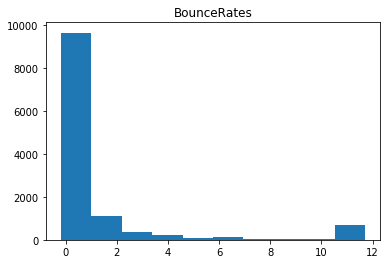

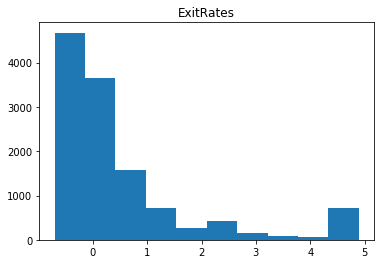

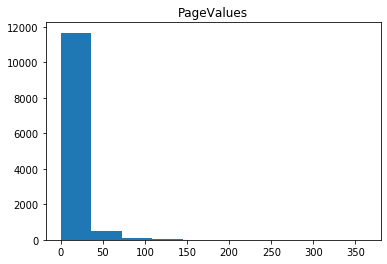

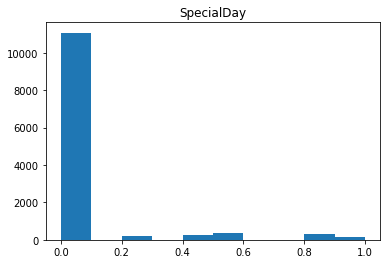

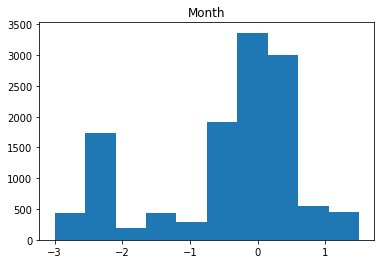

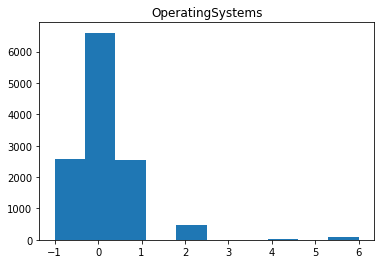

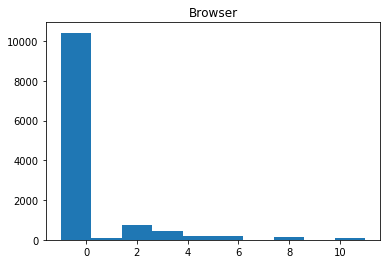

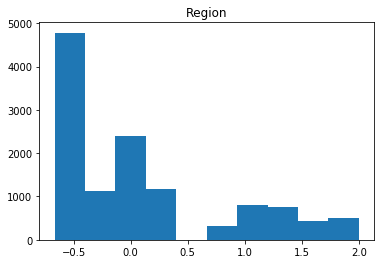

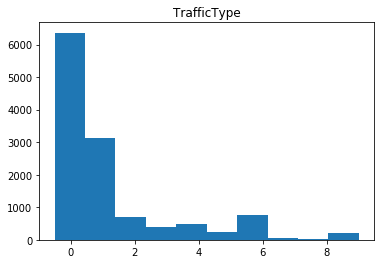

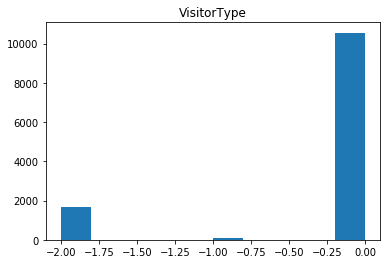

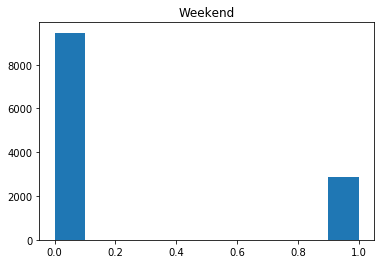

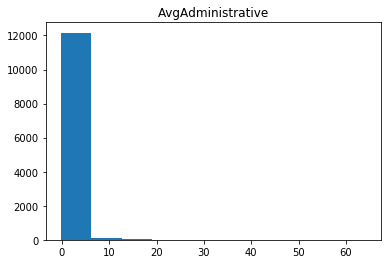

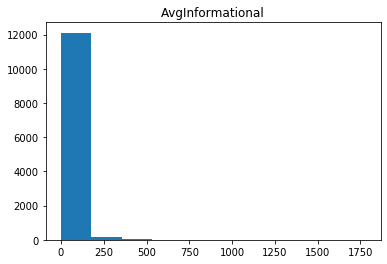

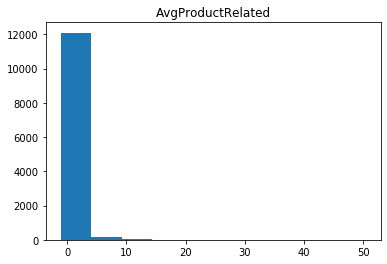

In [66]:
X_copy = X.copy()
rc = RobustScaler()
X_rc=rc.fit_transform(X_copy)
X_rc=pd.DataFrame(X_rc,columns=X.columns)

for idx,column in enumerate(X_rc.columns):
    plt.figure(idx)
    X_rc.hist(column=column,grid=False)

In [ ]:
X_rc.describe()

In [ ]:
for idx,column in enumerate(X.columns): 
    ax=plt.figure(idx)
    plt.scatter(x=X[column],y=Y)
    plt.xlabel(column)

In [ ]:
plt.title('Is linear or not check')
plt.xlabel('June')
plt.ylabel('Revenue')
sns.regplot(x=X['June'], y=Y)

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [68]:
def row(name,y_test,yp_test,y_train,yp_train):
    li=[]
    li.append(name);
    li.append(accuracy_score(y_train, yp_train))
    li.append(accuracy_score(y_test, yp_test))
    li.append(precision_score(y_test, yp_test))
    li.append(recall_score(y_test, yp_test))
    return li

In [69]:
column_names = ["Classifier", "Train_Accuracy", "Test_Accuracy","Precision_Score","Recall_Score"]
resultdf = pd.DataFrame(columns = column_names)

In [70]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
list_one =[]
feature_ranking = SelectKBest(chi2, k=5)
fit = feature_ranking.fit(X, Y)

fmt = '%-8s%-20s%s'

for i, (score, feature) in enumerate(zip(feature_ranking.scores_, X.columns)):
    list_one.append((score, feature))
    
dfObj = pd.DataFrame(list_one) 
dfObj.sort_values(by=[0], ascending = False)

,0,1
2,175126.808512,PageValues
12,10662.599140,AvgInformational
11,6829.412944,AvgAdministrative
13,1143.263922,AvgProductRelated
4,86.163696,Month
3,53.797094,SpecialDay
9,37.547523,VisitorType
0,29.654336,BounceRates
1,28.985072,ExitRates
6,8.873291,Browser


In [71]:
X_rc.drop(['TrafficType','OperatingSystems'],axis=1,inplace=True)

In [72]:
from sklearn import linear_model
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_rc,Y,test_size=.2)

In [73]:
model = linear_model.SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
y_pred_test = model.predict(X_test)

In [75]:
y_pred_train = model.predict(X_train)

In [76]:
li=row("SGDClassifier",y_test,y_pred_test,y_train,y_pred_train)

In [77]:
resultdf.loc[len(resultdf.index)] = li
resultdf.head()

,Classifier,Train_Accuracy,Test_Accuracy,Precision_Score,Recall_Score
0,SGDClassifier,0.883313,0.881995,0.692308,0.509852


In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=17, random_state=0)
clf.fit(X_train, y_train)

C:\Users\Divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
y_pred1 = clf.predict(X_test)
y_pred2=clf.predict(X_train)

In [80]:
li=row("RandomForestClassifier",y_test,y_pred1,y_train,y_pred2,)
resultdf.loc[len(resultdf.index)] = li
resultdf.head()

,Classifier,Train_Accuracy,Test_Accuracy,Precision_Score,Recall_Score
0,SGDClassifier,0.883313,0.881995,0.692308,0.509852
1,RandomForestClassifier,0.983982,0.890916,0.721683,0.549261


In [81]:
model = XGBClassifier(learning_rate = 0.1, n_estimators=150, min_child_weight=3,  max_depth=13)
model.fit(X_train, y_train)

C:\Users\Divya\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [82]:
y_pred_test = model.predict(X_test)

In [83]:
y_pred_train = model.predict(X_train)

In [84]:
li=row("XGBClassifier",y_test,y_pred_test,y_train,y_pred_train)
resultdf.loc[len(resultdf.index)] = li
resultdf.head()

,Classifier,Train_Accuracy,Test_Accuracy,Precision_Score,Recall_Score
0,SGDClassifier,0.883313,0.881995,0.692308,0.509852
1,RandomForestClassifier,0.983982,0.890916,0.721683,0.549261
2,XGBClassifier,0.989964,0.893755,0.710526,0.598522
